In [1]:
#import necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
# matplot for plots and graphs 
import seaborn as sns 
import sklearn.datasets 
#for algorithms and datasets
from sklearn.model_selection import train_test_split
#used to split data into train and test data 
from xgboost import XGBRegressor 
from sklearn import metrics
#analyze the model 

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#show plots inline
%matplotlib inline


In [2]:
#importing dataset in kaggle
data = pd.read_csv('/kaggle/input/kenyan-dataset/Kenyan_data.csv')
#data is my dataframe 

In [3]:
data.head(30)

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_international,...,package_food,package_transport_local,package_sightseeing,package_guided_tour,package_insurance,nights_stayed,payment_mode,first_trip,most_impressing,total_cost
0,SWIZERLAND,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,13,Cash,No,Friendly People,674602.5
1,UNITED KINGDOM,25-44,Alone,1,0,Leisure and Holidays,Cultural tourism,others,Independent,No,...,No,No,No,No,No,14,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,UNITED KINGDOM,25-44,Alone,0,1,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,...,No,No,No,No,No,1,Cash,No,Excellent Experience,3315000.0
3,UNITED KINGDOM,25-44,Spouse,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,Yes,Yes,Yes,Yes,No,11,Cash,Yes,Friendly People,7790250.0
4,CHINA,Jan-24,Alone,1,0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,7,Cash,Yes,No comments,1657500.0
5,UNITED KINGDOM,25-44,Alone,0,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,...,No,No,Yes,Yes,No,9,Cash,Yes,Wildlife,120950.0
6,SOUTH AFRICA,45-64,Alone,0,1,Business,Mountain climbing,"Friends, relatives",Independent,No,...,No,No,No,No,No,9,Cash,Yes,Friendly People,466140.0
7,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1,1,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,...,Yes,Yes,Yes,Yes,Yes,10,Cash,Yes,Friendly People,3480750.0
8,NIGERIA,25-44,Alone,0,1,Leisure and Holidays,Cultural tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,4,Cash,Yes,Friendly People,994500.0
9,INDIA,25-44,Alone,1,0,Business,Wildlife tourism,"Travel, agent, tour operator",Independent,No,...,No,No,No,No,No,5,Credit Card,Yes,Friendly People,2486250.0


In [4]:
data.shape

(4809, 21)

In [5]:
# check for missing values on  datasets
data.isnull().sum()

country                            0
age_group                          0
travel_with                        0
total_female                       0
total_male                         0
purpose                            0
main_activity                      0
info_source                        0
tour_arrangement                   0
package_transport_international    0
package_accomodation               0
package_food                       0
package_transport_local            0
package_sightseeing                0
package_guided_tour                0
package_insurance                  0
nights_stayed                      0
payment_mode                       0
first_trip                         0
most_impressing                    0
total_cost                         0
dtype: int64

In [6]:
# Clearing errors and missing values from data set
# For the travel_with and most_impressing columns, fill in with a new category, None
data['travel_with'] = data['travel_with'].replace(np.nan, 'Alone')
#replacing the nan values in the total_female column of the training data with 1.0

data['total_female'] = data['total_female'].replace(np.nan, 1.0)
#replacing the nan values in the total_male column of the training data with 1.0

data['total_male'] = data['total_male'].replace(np.nan, 1.0)

#replacing the nan values in the most_impressing column of the training data with No comments

data['most_impressing'] = data['most_impressing'].replace(np.nan, 'No comments')
#replacing 24-jan to 1-24 to correlate with 

data['age_group'] = data['age_group'].replace('24-Jan', '1-24')
# %convert float dtypes to int[total_female,total_male,night_mainland,night_zanzibar]
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["nights_stayed"] = data['nights_stayed'].astype('int')
# %Let's generate new features from some columns which makes some sense
data["total_people"] = data["total_female"] + data["total_male"]

data["nights_stayed"] = data["nights_stayed"]
#chech for missing values
data.isnull().sum()
# %then it's time to encode objects into numeric

country                            0
age_group                          0
travel_with                        0
total_female                       0
total_male                         0
purpose                            0
main_activity                      0
info_source                        0
tour_arrangement                   0
package_transport_international    0
package_accomodation               0
package_food                       0
package_transport_local            0
package_sightseeing                0
package_guided_tour                0
package_insurance                  0
nights_stayed                      0
payment_mode                       0
first_trip                         0
most_impressing                    0
total_cost                         0
total_people                       0
dtype: int64

In [7]:
#The mean, standard deviation, minimum, maximum and percentiles of the dataset are described below.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,4809.0,9.268039e-01,1.287841e+00,0.0,0.0,1.0,1.0,49.0
total_male,4809.0,1.009565e+00,1.138273e+00,0.0,1.0,1.0,1.0,44.0
nights_stayed,4809.0,8.488043e+00,1.042762e+01,0.0,3.0,6.0,11.0,145.0
total_cost,4809.0,8.114389e+06,1.222490e+07,49000.0,812175.0,3397875.0,9945000.0,99532875.0
total_people,4809.0,1.936369e+00,2.079260e+00,0.0,1.0,2.0,2.0,93.0


In [9]:
# convert float dtypes to int[total_female,total_male,nights_stayed,total_people]
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["nights_stayed"] = data['nights_stayed'].astype('int')
data["total_people"] = data['total_people'].astype('int')

In [10]:
data.country = data.country.replace("SWIZERLAND", "SWITZERLAND")
data.country = data.country.replace("BURGARIA","BULGARIA")
data.country = data.country.replace("MALT","MALTA")
data.country = data.country.replace("DRC","DEMOCRATIC REPUBLIC OF THE CONGO")
data.country = data.country.replace("DRC","DEMOCRATIC REPUBLIC OF THE CONGO")
data.country = data.country.replace("SCOTLAND","UNITED KINGDOM")
data.country = data.country.replace("UAE","UNITED ARAB EMIRATES")
data.country = data.country.replace("PHILIPINES","PHILIPPINES")
data.country = data.country.replace("DJIBOUT","DJIBOUTI")
data.country = data.country.replace("MORROCO","MOROCCO")
data.info_source=data.info_source.replace("Tanzania Mission Abroad","Kenya Tourist Board")
data.age_group=data.age_group.replace("Jan-24","1-24")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          4809 non-null   object 
 1   age_group                        4809 non-null   object 
 2   travel_with                      4809 non-null   object 
 3   total_female                     4809 non-null   int64  
 4   total_male                       4809 non-null   int64  
 5   purpose                          4809 non-null   object 
 6   main_activity                    4809 non-null   object 
 7   info_source                      4809 non-null   object 
 8   tour_arrangement                 4809 non-null   object 
 9   package_transport_international  4809 non-null   object 
 10  package_accomodation             4809 non-null   object 
 11  package_food                     4809 non-null   object 
 12  package_transport_lo

Explorative data analysis 
UNIVARIATE ANALYSIS FOR NUMERICAL DATA ON DATASET

WHAT IS THE INFO SOURCE OF TOURIST?

sns.countplot(...): This function creates a count plot using seaborn, which is a type of bar plot that shows the count of observations in each category. It counts the occurrences of different categories of data and displays them as bars.


sns.barplot is a function provided by the Seaborn library in Python for creating bar plots. Bar plots are used to visualize the relationship between a categorical variable and a continuous variable


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)): This line adds a legend to the plot. It specifies the location of the legend to be 'center left' and positions it outside the plot using the bbox_to_anchor parameter. This is useful when the legend overlaps with the plot content.

data=data: Specifies the DataFrame data from which the data will be drawn.


plt.legend(...): This function adds a legend to the plot, which helps in identifying the different categories represented by the colors in the plot.

loc='center left': Specifies the location of the legend to be 'center left', which means it will be placed to the left of the plot.
bbox_to_anchor=(1, 0.5): Specifies the position of the legend relative to the plot area. Here, (1, 0.5) means the legend will be anchored at the point (1, 0.5) of the plot, which is the far-right side and vertically centered.

plt.xticks(rotation=90): Rotates the x-axis labels by 90 degrees for better readability. This is often necessary when the x-axis labels are long or numerous to prevent overlapping.


 sns.set_style("darkgrid"), you are configuring Seaborn to apply the "darkgrid" style to all subsequent plots created using Seaborn in the current session, unless the style is explicitly changed again later. This helps ensure consistency in the appearance of your plots throughout your data analysis or visualization process.

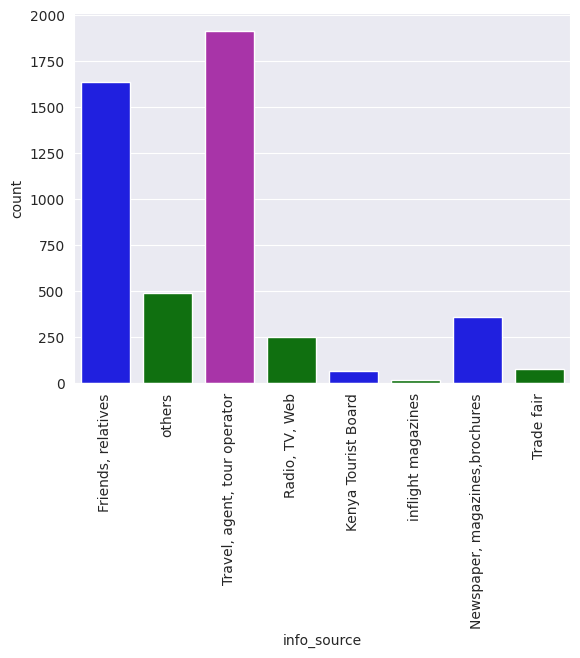

In [12]:
#info source of the tourist 

# Set the style
sns.set_style("darkgrid")

# Create the count plot
info_sources = sns.countplot(x='info_source', data=data, palette=['blue', 'green'])
# Get the patches and set facecolor for the tallest patch
patch_h = [patch.get_height() for patch in info_sources.patches]
idx_tallest = np.argmax(patch_h)
info_sources.patches[idx_tallest].set_facecolor('#a834a8')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()


The highest coun of information source for tourist visiting kenya is travel agent and tour operator. There is a lowcount of publicity using media source.

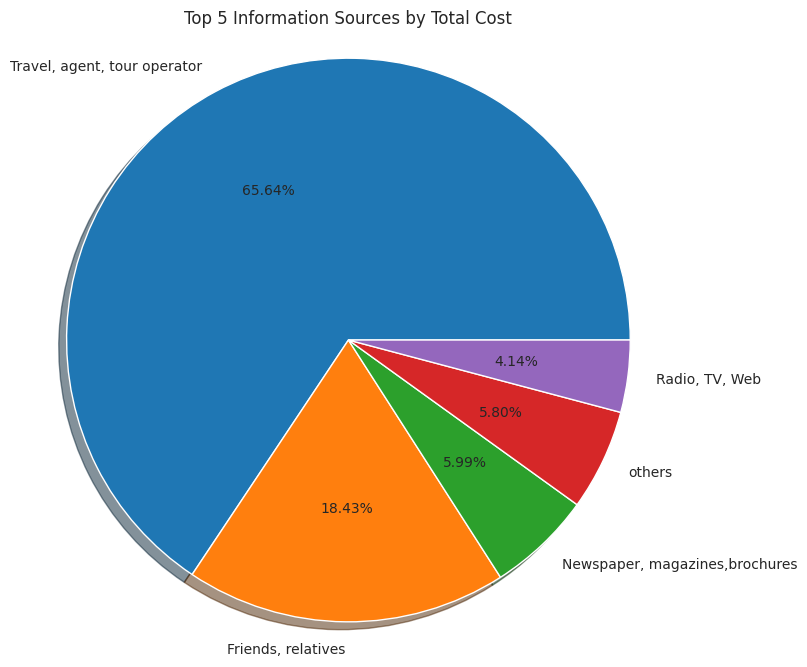

In [13]:


# Group by 'info_source' and calculate the sum of 'total_cost', then select the top 5 largest
top_info_sources = data.groupby('info_source')['total_cost'].sum().nlargest(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_info_sources, labels=top_info_sources.index, autopct='%1.2f%%', shadow=True)
plt.title('Top 5 Information Sources by Total Cost')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [14]:
#What are the top 5 countries with the highest spending statistic ?
data_country = data.groupby('country')['total_cost'].sum().sort_values(ascending = False).head(6)
data_country

country
UNITED STATES OF AMERICA    8.890832e+09
UNITED KINGDOM              3.846922e+09
ITALY                       3.762160e+09
FRANCE                      3.344496e+09
AUSTRALIA                   2.743132e+09
SOUTH AFRICA                2.594805e+09
Name: total_cost, dtype: float64

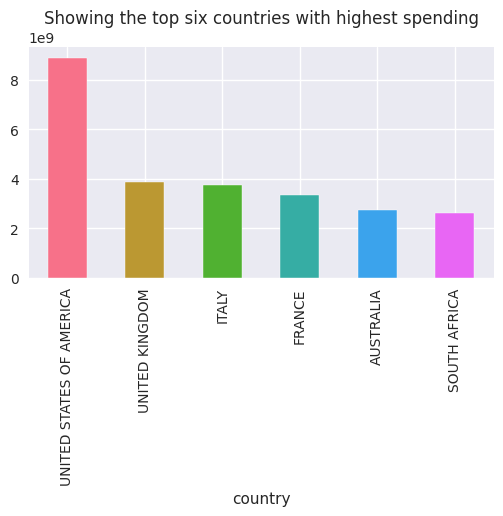

In [15]:


# Set seaborn style
plt.style.use('seaborn')

# Define a custom color palette with many colors
colors = sns.color_palette('husl', len(data_country))

# Plot the data with custom colors
data_country.plot(figsize=(6, 3), legend=False, kind='bar', color=colors)

# Set title
plt.title('Showing the top six countries with highest spending')

# Show plot
plt.show()




In [16]:
#which age-group are the highest spenders and who are the over all highest spenders by travel with?
data_age = data.groupby('age_group')['total_cost'].sum().sort_values(ascending = False)
data_age

age_group
45-64    1.537184e+10
25-44    1.498710e+10
65+      5.284068e+09
1-24     3.379088e+09
Name: total_cost, dtype: float64

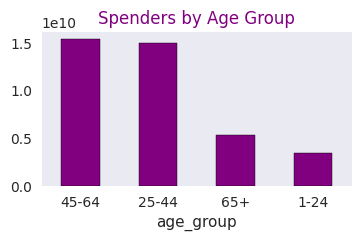

In [18]:

# Plot the bar plot with purple color and black edge
data_age.plot.bar(edgecolor='black', color='purple', grid=False, figsize=(4, 2))

plt.title('Spenders by Age Group', color='purple')  # Set title with purple color
plt.xticks(rotation='horizontal')  # Rotate x-axis labels horizontally
plt.show()


In [19]:
45-64 age_group are the highest spenders while 1-24 age group are the least spenders

SyntaxError: invalid syntax (3130172342.py, line 1)

In [20]:
#data['age_group'].value_counts() gives you a count of how many times each age group appears in the 'age_group' column of the DataFrame data.
data['age_group'].value_counts()

age_group
25-44    2487
45-64    1391
1-24      624
65+       307
Name: count, dtype: int64

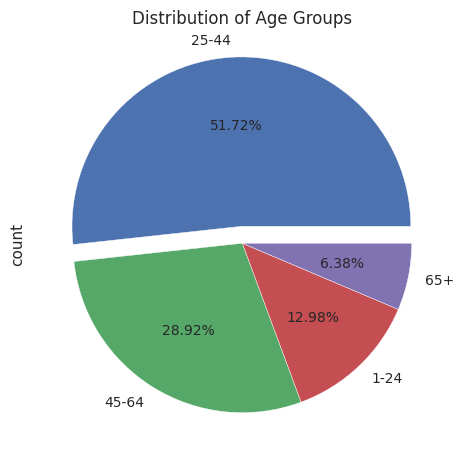

In [21]:
#unexploded pie
#data.value_counts('age_group').plot(kind = 'pie', autopct = '%1.2f%%')


data['age_group'].value_counts().plot(kind='pie', autopct='%1.2f%%', explode=(0.1, 0, 0, 0))

# Add title
plt.title('Distribution of Age Groups')

# Show the plot
plt.show()


The pie chart shows that the majority age group is 25 -44 and the least age group is 65+

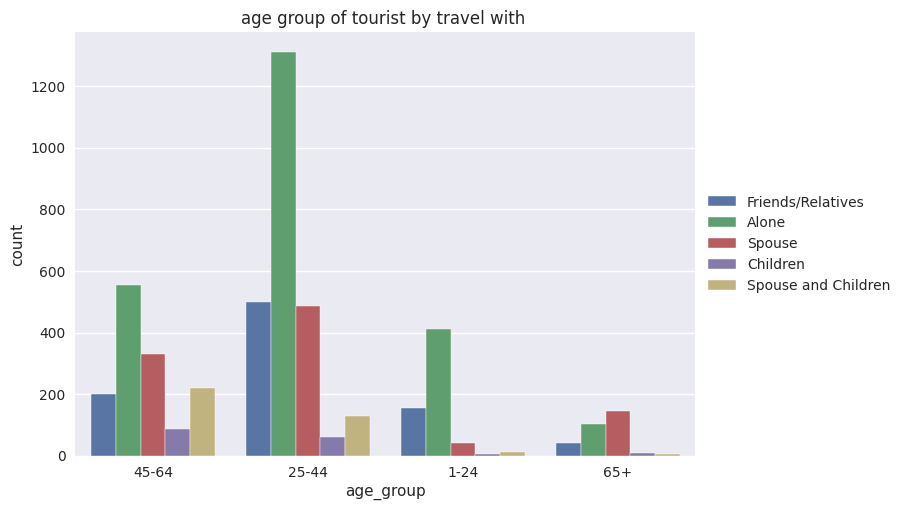

<Figure size 600x300 with 0 Axes>

In [22]:
sns.countplot(x = 'age_group', hue = 'travel_with', data = data)
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.title('age group of tourist by travel with ')
plt.figure(figsize = (6,3))
plt.show()

Age group 25 - 44 has the highest count of tourist who travelled alone, friend/relatives, spouse and age group 65+ has a least count of tourist who travelled with wife and children

In [24]:
data_age_group = data.groupby(['age_group', 'travel_with'])['total_cost'].sum()
data_age_group
# age goup with repect to travel with total spendings

age_group  travel_with        
1-24       Alone                  1.514977e+09
           Children               1.373354e+07
           Friends/Relatives      1.387789e+09
           Spouse                 2.243549e+08
           Spouse and Children    2.382334e+08
25-44      Alone                  3.497563e+09
           Children               3.934924e+08
           Friends/Relatives      4.350254e+09
           Spouse                 4.763236e+09
           Spouse and Children    1.982554e+09
45-64      Alone                  2.595812e+09
           Children               1.093086e+09
           Friends/Relatives      2.648244e+09
           Spouse                 4.644731e+09
           Spouse and Children    4.389966e+09
65+        Alone                  1.109483e+09
           Children               1.531898e+08
           Friends/Relatives      7.724125e+08
           Spouse                 3.113983e+09
           Spouse and Children    1.349995e+08
Name: total_cost, dtype: floa

In [25]:
data_travel_with = data.groupby('travel_with')['total_cost'].sum().sort_values(ascending = False)
data_travel_with
#data_travel_with will display the result, showing the total cost associated with each unique value in the 'travel_with' column, sorted from highest to lowes

travel_with
Spouse                 1.274631e+10
Friends/Relatives      9.158700e+09
Alone                  8.717835e+09
Spouse and Children    6.745753e+09
Children               1.653502e+09
Name: total_cost, dtype: float64

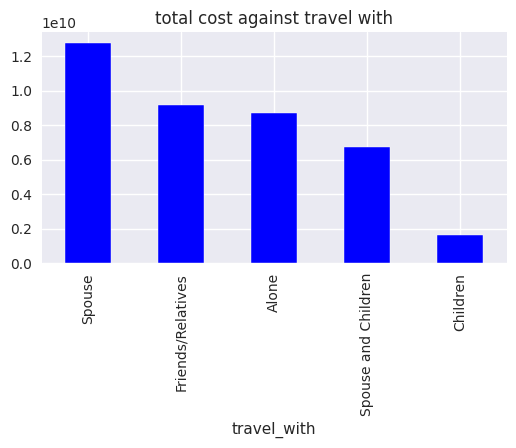

In [26]:
plt.style.use('seaborn')
data_travel_with.plot(kind = 'bar', legend = False, colormap = 'winter', figsize = (6,3))
plt.title('total cost against travel with')
plt.show()

Tourist who travel with their spouse are the most spenders

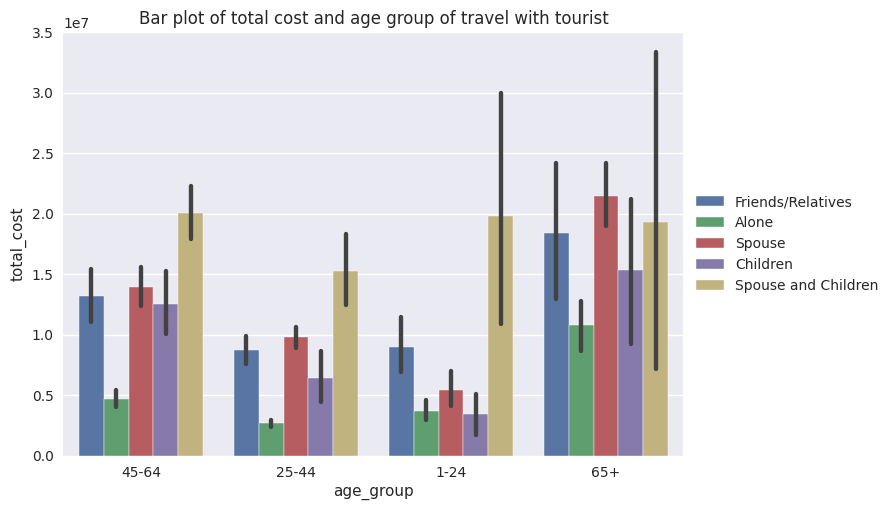

In [27]:
sns.barplot(y = 'total_cost', x = 'age_group',  hue = 'travel_with', data = data)
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.title('Bar plot of total cost and age group of travel with tourist')
plt.show()

Tourist who are 65+ and having spouse spend the highest cost, tourist in the age group of 25-44 who are alone spend the least

In [28]:
data_main_activity = data.groupby('main_activity')['total_cost'].sum().sort_values(ascending = False)
data_main_activity

main_activity
Wildlife tourism            2.393484e+10
Beach tourism               7.712958e+09
Conference tourism          3.782597e+09
Cultural tourism            1.432819e+09
Hunting tourism             8.734764e+08
business                    4.712545e+08
Mountain climbing           4.359085e+08
Diving and Sport Fishing    2.222264e+08
Bird watching               1.560128e+08
Name: total_cost, dtype: float64

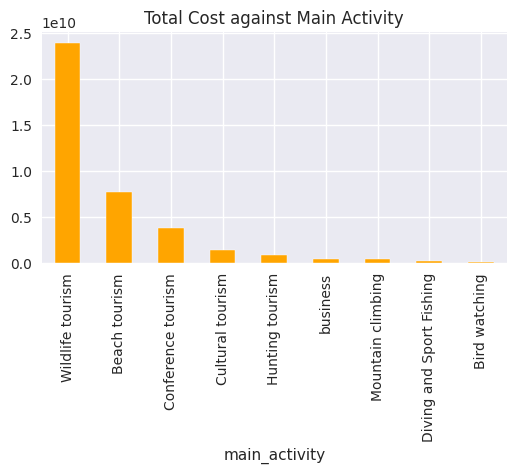

In [29]:
plt.style.use('seaborn')
data_main_activity.plot(kind='bar', legend=False, color='orange', figsize=(6, 3))
plt.title('Total Cost against Main Activity')
plt.show()


<Axes: xlabel='payment_mode', ylabel='count'>

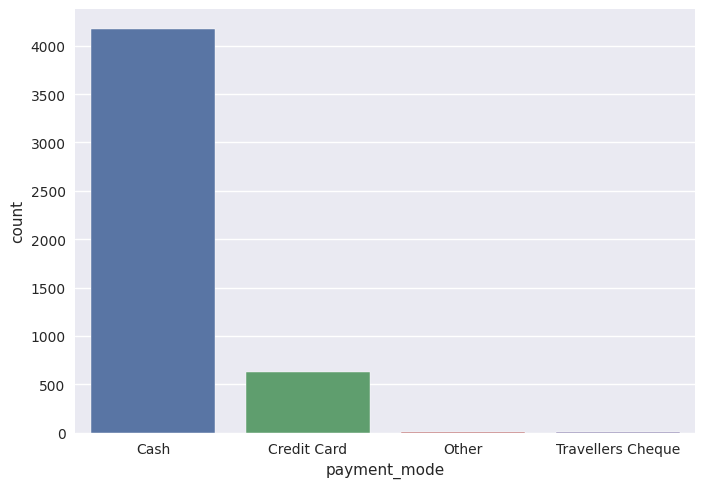

In [30]:

#what is the most prefered payment mode by tourists?
sns.countplot(x = 'payment_mode', data = data)



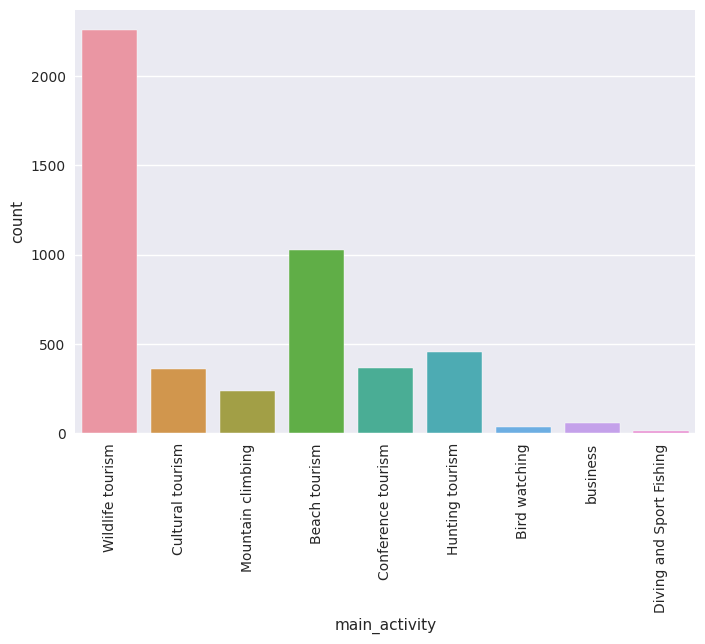

In [31]:
######Highlight the Aspects of tourism that are more profitable and in which it is worthwhile to invest in
sns.countplot(x = 'main_activity', data = data)
plt.xticks(rotation = 90)
plt.show()

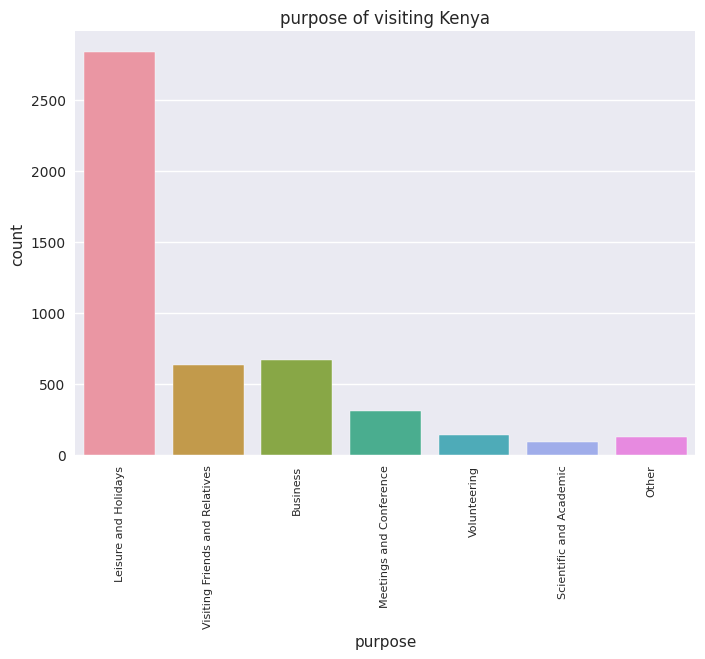

In [32]:
# considering the purpose
sns.countplot(x = 'purpose', data = data)
plt.xticks(rotation = 90, fontsize = 8 )
plt.title('purpose of visiting Kenya')
plt.show()

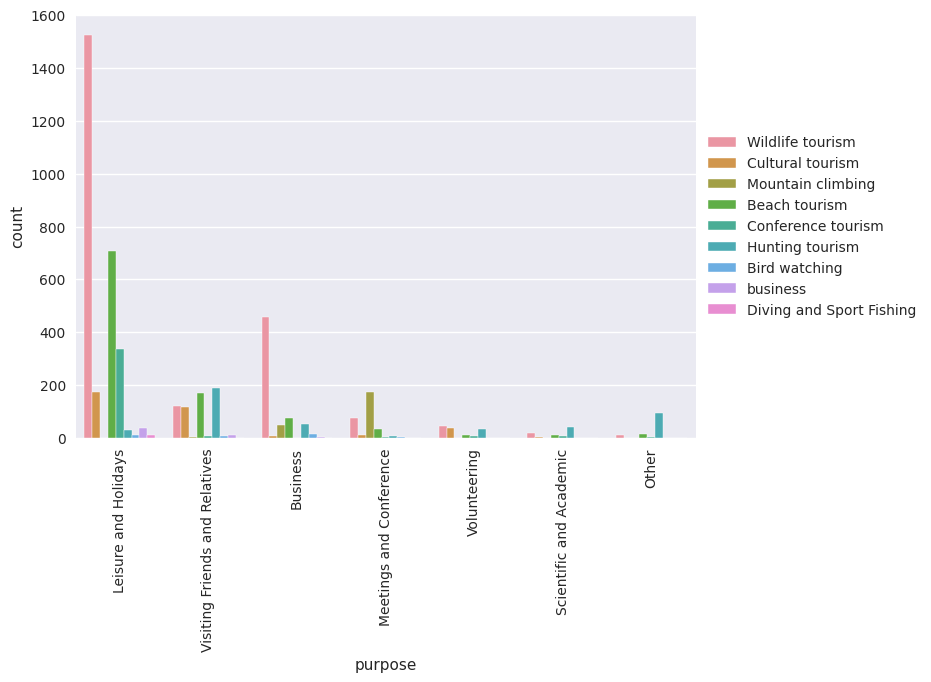

In [33]:
sns.countplot( x = 'purpose', hue = 'main_activity', data = data)
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.xticks (rotation =90)
plt.show()

the code creates a count plot to visualize the distribution of purposes of visiting (x-axis) based on different main activities (grouped bars). It adds a legend to help identify the main activities, rotates the x-axis labels for readability, and then displays the plot.

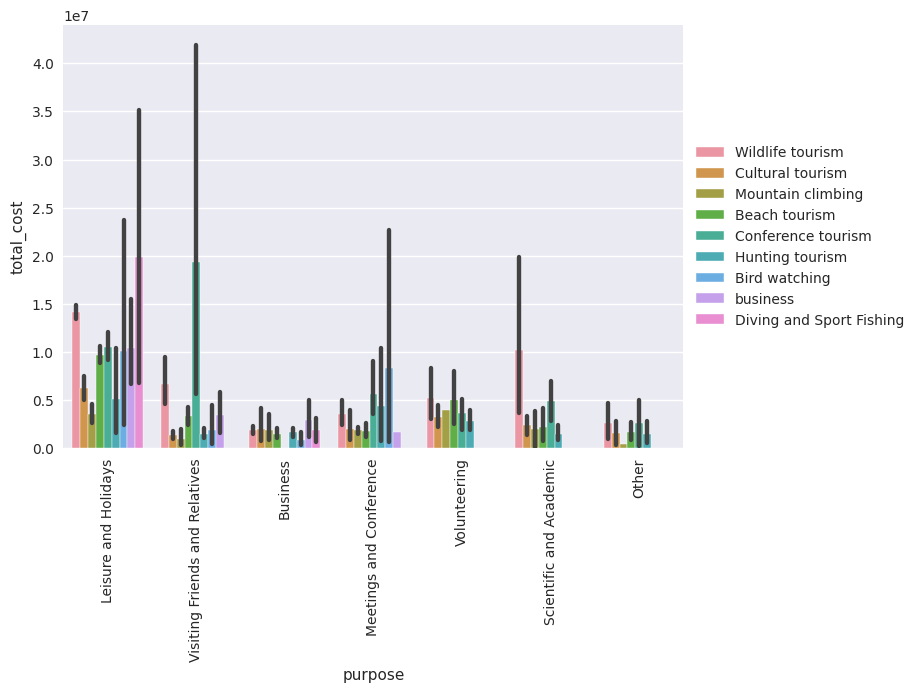

In [34]:
sns.barplot(x = 'purpose', y = 'total_cost', hue = 'main_activity', data = data)
plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))
plt.xticks (rotation =90)
plt.show()

In [36]:

#model Building
for colname in data.select_dtypes("object"):
    data[colname],_=data[colname].factorize()
# Now all columns that can be converted to numeric have been converted
# Step 3 model building

In [37]:
data.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_international,...,package_transport_local,package_sightseeing,package_guided_tour,package_insurance,nights_stayed,payment_mode,first_trip,most_impressing,total_cost,total_people
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,13,0,0,0,674602.5,2
1,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,14,0,1,1,3214906.5,1
2,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,1,0,0,2,3315000.0,1
3,1,1,2,1,1,0,0,2,1,0,...,1,1,1,0,11,0,1,0,7790250.0,2
4,2,2,1,1,0,0,0,2,0,0,...,0,0,0,0,7,0,1,3,1657500.0,1


In [38]:
numeric_columns = data.select_dtypes(include='number').columns
print(numeric_columns)


Index(['country', 'age_group', 'travel_with', 'total_female', 'total_male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_international', 'package_accomodation',
       'package_food', 'package_transport_local', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'nights_stayed',
       'payment_mode', 'first_trip', 'most_impressing', 'total_cost',
       'total_people'],
      dtype='object')


In [39]:
warnings.filterwarnings('ignore')
x= data.drop("total_cost", axis=1)
y = data.pop("total_cost")
#after executing these two lines of code, 
#x will contain the features (independent variables) of the dataset, 
#while y will contain the target variable (dependent variable) "total_cost".
#This is a common approach in supervised learning tasks where you separate the features and target variable to prepare the data for training a machine learning model.

In [40]:
print(y.value_counts())


total_cost
1657500.0     154
3315000.0     109
828750.0       88
497250.0       76
331500.0       76
             ... 
240337.5        1
2361937.5       1
425000.0        1
37956750.0      1
2246636.7       1
Name: count, Length: 1637, dtype: int64


In [41]:
#Convert categorical variables to dummy variables
x = pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=42)

In [42]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(3366, 21) (3366,)
(1443, 21) (1443,)


In [43]:
#using catboost
from catboost import CatBoostRegressor
predictions = []
for i in range(10):
  # Training the model
  ct=CatBoostRegressor(iterations=1000, 
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = i
                    )
ct.fit(x_train, y_train)

In [46]:
 # Making predictions
preds = ct.predict(x_test)
predictions.append(preds)

# Averaging the predictions
preds = np.mean(predictions, axis = 0)
preds

array([ 8612130.63604591,   698445.27304175,  1887972.05868304, ...,
        5915173.34762821,   567511.1297576 , 15136663.35290364])

In [ ]:
array([ 8612130.63604591,   698445.27304175,  1887972.05868304, ...,
        5915173.34762821,   567511.1297576 , 15136663.35290364])

In [47]:
# Model evaluation
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, preds)**0.5
print('Error {}'.format(mae))

Error 2187.181866641503


Error 2187.181866641503

In [48]:
# Doing our prediction.
sub = y
predictions_ct = ct.predict(sub)
predictions_ct

8679995.993100591

8679995.993100591

In [49]:
# Doing our prediction.
sub = x_test
predictions_ct = ct.predict(sub)
predictions_ct

array([ 8612130.63604591,   698445.27304175,  1887972.05868304, ...,
        5915173.34762821,   567511.1297576 , 15136663.35290364])

In [51]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import math

In [52]:
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,preds))

#R2 Score
r2_test = r2_score(y_test,preds)

# Adjusted R2 Score
n= x_train.shape[0] # total no of datapoints
p= x_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

#print results
mae = mean_absolute_error(y_test, preds)**0.5
print('Error {}'.format(mae))
print("Evaluation on test data")
print("RMSE: {:.2f}".format(Rmse_test))
print('R2: {:.2f}'.format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Error 2187.181866641503
Evaluation on test data
RMSE: 9244973.96
R2: 0.39
Adjusted R2: 0.38


Error 2187.181866641503
Evaluation on test data
RMSE: 9244973.96
R2: 0.39
Adjusted R2: 0.38

In [54]:
new_prices = x_test.assign(predicted_prices = predictions_ct)
new_prices.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_international,...,package_transport_local,package_sightseeing,package_guided_tour,package_insurance,nights_stayed,payment_mode,first_trip,most_impressing,total_people,predicted_prices
1448,62,1,0,0,2,1,3,2,1,0,...,1,1,1,1,12,0,0,4,2,8.612131e+06
2932,34,0,1,0,1,1,1,0,0,0,...,0,0,0,0,11,0,0,4,1,6.984453e+05
794,4,1,1,0,1,4,0,3,0,0,...,0,0,0,0,10,0,1,0,1,1.887972e+06
1029,35,1,1,0,1,2,0,2,0,0,...,0,0,0,0,6,0,0,0,1,6.862742e+05
8,5,1,1,0,1,0,1,2,0,0,...,0,0,0,0,4,0,1,0,1,7.684588e+05


In [55]:
#Using Linear regression

from sklearn.metrics import log_loss, accuracy_score, classification_report, roc_auc_score, \
confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
RSEED=42
#A QuantileTransformer is used to normalize the target distribution 
#before applying a LinearRegression model.
#transform the targets before learning a model
y_tran = quantile_transform(
    y.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

In [57]:
num_features = list(x.select_dtypes(include=['int64', 'float64']).columns)
#num_features = list(df.select_dtypes(include=['int64', 'float64']).columns)
#num_features.remove('total_cost')
#num_features.remove('total_cost_euro')


numeric_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

#categorical_features = list(df.select_dtypes(include=['object']).columns)
categorical_features = list(x.select_dtypes(include=['object']).columns)

categorical_transformer =OneHotEncoder(handle_unknown="ignore")

#combine the two preprocessed steps together
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [58]:
model = LinearRegression()
clf = Pipeline(
    steps=[("preprocessor", preprocessor), 
    ("model", model)]
)
#fit the model
clf.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['country', 'age_group',
                                                   'travel_with',
                                                   'total_female', 'total_male',
                                                   'purpose', 'main_activity',
                                                   'info_source',
                                                   'tour_arrangement',
                                                   'package_transport_international',
                                                   'package_accomodation',
                                                   'package_food',
                                                   'package_transport_local',
                                                   'package_sightseeing',
                                                   'package_guided_tour',
                                                   'package_insurance',
                                                   'nights_stayed',
                                                   'payment_mode', 'first_trip',
                                                   'most_impressing',
                                                   'total_people']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('model', LinearRegression())])

This code segment creates a linear regression model and fits it to the training data using scikit-learn's `Pipeline` class. 

1Model Initialization
   - `model = LinearRegression()`: This line initializes a linear regression model. Linear regression is a simple statistical model used to predict the relationship between two or more variables by fitting a linear equation to observed data.

Pipeline Initialization:
   - `Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])`: This line initializes a scikit-learn `Pipeline` object. A pipeline allows you to chain together multiple processing steps, such as preprocessing and modeling, into a single object. 
   - `("preprocessor", preprocessor)`: This specifies the preprocessing step of the pipeline. `preprocessor` is an object (presumably a transformer) that performs preprocessing on the input data. It could include steps like imputation, scaling, or encoding of categorical variables.
   - `("model", model)`: This specifies the modeling step of the pipeline. `model` is the linear regression model initialized earlier.

Fitting the Model
   - `clf.fit(x_train, y_train)`: This line fits the pipeline to the training data. `x_train` contains the features (independent variables), and `y_train` contains the target variable (dependent variable) that the model aims to predict. The pipeline applies preprocessing steps specified in `preprocessor` to `x_train`, and then fits the linear regression model (`model`) to the preprocessed data along with the target variable `y_train`.

After fitting the pipeline, the resulting `clf` object can be used to make predictions on new data.

In [59]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(4809, 21)
(3366, 21)
(1443, 21)


(4809, 21)
(3366, 21)
(1443, 21)

In [60]:
print("train score: ", clf.score(x_train, y_train))
print("test score: ", clf.score(x_test, y_test))

train score:  0.32161844895591196
test score:  0.315836040397077


train score:  0.32161844895591196
test score:  0.315836040397077

In [63]:
# making predictions
y_pred = clf.predict(x_test)

In [64]:
print(y_pred)

[ 7794722.19891554  1026372.15657126  1638447.58487505 ...
 16814835.5333359   1872702.96658579 14322499.91372054]


[ 7794722.19891554  1026372.15657126  1638447.58487505 ...
 16814835.5333359   1872702.96658579 14322499.91372054]

In [66]:
# model evaluation
score=r2_score(y_test, y_pred)
print("r2 score (R2): ",score)
print("mean_sqrd_error (MSE): ",mean_squared_error(y_test,y_pred))
print('mean_absolute_error (MAE): ', mean_absolute_error(y_test, y_pred))
print("root_mean_squared error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score (R2):  0.315836040397077
mean_sqrd_error (MSE):  95278096802393.48
mean_absolute_error (MAE):  5738657.788009061
root_mean_squared error (RMSE):  9761049.984627344


r2 score (R2):  0.315836040397077
mean_sqrd_error (MSE):  95278096802393.48
mean_absolute_error (MAE):  5738657.788009061
root_mean_squared error (RMSE):  9761049.984627344

In [67]:
from xgboost import XGBRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Define the pipeline
kenya_tourism_model = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("regressor", XGBRegressor())]
)

# Fit the model
kenya_tourism_model.fit(x_train, y_train)

# Make predictions
y_pred_xgb_boost = kenya_tourism_model.predict(x_test)

plt.figure(figsize=(15, 7))

plt.scatter(y_train, kenya_tourism_model.predict(x_train),
            c='black', marker='o', s=50, alpha=0.5,
            label='Train data')

plt.scatter(y_test, y_pred_xgb_boost,
            c='g', marker='o', s=50, alpha=0.7,
            label='Test data')

plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual price vs Predicted price')
plt.legend(loc='upper right')
plt.show()



[22834508.   1350597.9  5732298.  ...  6963935.5  1478147.2 39952984. ]

In [68]:
#model Training
#XGBOOST REGRESSOR
#loading the model
model=XGBRegressor()
#training the model with x_train
# Instantiate an object of XGBModel class
model = XGBRegressor()
# Call the fit method on the instantiated object
model.fit(X=x_train, y=y_train)
#Evaluation 
training_data_prediction=model.predict(x_train)
#R squared error 
score_1=metrics.r2_score(y_train,training_data_prediction)
#find the variants btwn both 
#mean absolute error 
score_2= metrics.mean_absolute_error(y_train,training_data_prediction)
#find difference and give mean
print('R squared error :', score_1)
print('Mean absolute Error:', score_2)
#prediction on training data
test_data_prediction=model.predict(x_test)
#R squared error 
score_1=metrics.r2_score(y_test,test_data_prediction)
#find the variants btwn both 
#mean absolute error 
score_2= metrics.mean_absolute_error(y_test,test_data_prediction)
#find difference and give mean
print('R squared error :', score_1)
print('Mean absolute Error:', score_2)

R squared error : 0.920730487075573
Mean absolute Error: 1897756.2029429728
R squared error : 0.273580993745267
Mean absolute Error: 5593006.270255983


R squared error : 0.920730487075573
Mean absolute Error: 1897756.2029429728
R squared error : 0.273580993745267
Mean absolute Error: 5593006.270255983

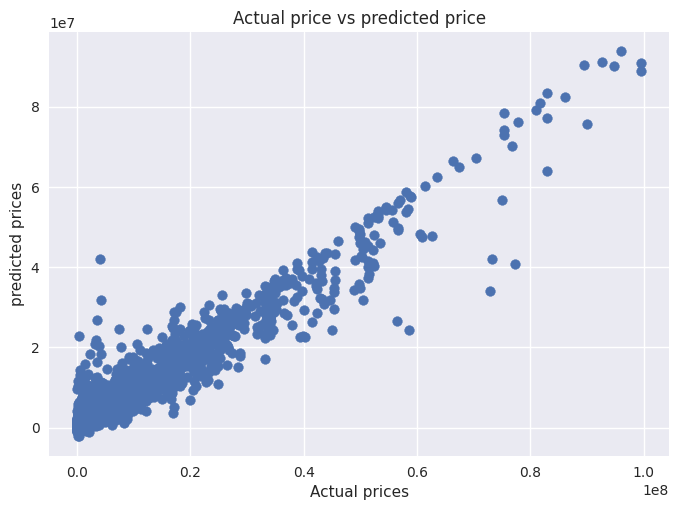

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title('Actual price vs predicted price')
plt.show
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

plt.scatter(y_train,training_data_prediction,
          c = 'black', marker = 'o', s = 50, alpha = 0.5,
          label = 'Train data')
plt.scatter(y_test,test_data_prediction,
          c = 'g', marker = 'o', s = 50, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper right')
plt.show()

data.head()